In [1]:
import os
import argparse
import torch
import random
import numpy as np
from tqdm import tqdm
from torch.utils.data import random_split

from model.crnn import CRNN
from model.MyCrnn import MyCRNN
from dataset import DatasetImg
from dataset_v2 import DatasetImg_v2
from utils.utils import *
from utils.StrLabelConverter import *
from trainer import *

c:\Users\tandat17z\anaconda3\envs\env_tandat17z\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
random.seed(1708)
np.random.seed(1708)
torch.manual_seed(1708) # Comment lại để cho khởi tạo tham số ngẫu nhiên


In [3]:
device = ( "cuda" if torch.cuda.is_available() else "cpu")
print("---------------------------------------------------")
print(f"Using {device} device")
print("---------------------------------------------------")

with open(os.path.join('data/char_v2.txt'), 'r', encoding='utf-8') as f:
    alphabet = f.read().rstrip()
# print(alphabet)
converter = StrLabelConverter(alphabet, ignore_case=False)
converter.numClass

---------------------------------------------------
Using cpu device
---------------------------------------------------


159

In [5]:
# --------------Tạo Dataset -------------------------------------------------------
print('Sử dụng dataset_v2')
train_dataset = DatasetImg_v2('data/TuTao/train/img',  'data/TuTao/train/label', imgW= 512, threshold=75)
test_dataset = DatasetImg_v2('data/TuTao/test/img',  'data/TuTao/test/label', imgW= 512, threshold=75)


Sử dụng dataset_v2


In [6]:
type = 'CRNN'

In [7]:
# --------------------- Create Model ---------------------------------
if type == 'CRNN':
    model = CRNN(converter.numClass, 200).to(device)

criterion = torch.nn.CTCLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


>>>> use CRNN-------------



In [8]:
checkpoint = 'checkpoint/TuTao/checkpoint-200.pth.tar'
if checkpoint:
    checkpoint = torch.load(checkpoint, map_location=torch.device(device))
    model.load_state_dict(checkpoint['model_state_dict'])
    epoch = checkpoint['epoch']
    log = checkpoint['log']

In [14]:
log

[{'type': 'train',
  'epoch': 1,
  'avg_Loss': 6.89025664747807,
  'levenshtein_Loss': 33.708771929824564},
 {'type': 'train',
  'epoch': 2,
  'avg_Loss': 3.928968013294956,
  'levenshtein_Loss': 33.717894736842105},
 {'type': 'train',
  'epoch': 3,
  'avg_Loss': 3.894311651932566,
  'levenshtein_Loss': 33.717894736842105},
 {'type': 'train',
  'epoch': 4,
  'avg_Loss': 3.890865639134457,
  'levenshtein_Loss': 33.717894736842105},
 {'type': 'train',
  'epoch': 5,
  'avg_Loss': 3.867916859409265,
  'levenshtein_Loss': 33.717894736842105},
 {'type': 'val',
  'epoch': 5,
  'avg_Loss': 4.0588065934007185,
  'levenshtein_Loss': 33.12408759124087},
 {'type': 'train',
  'epoch': 6,
  'avg_Loss': 3.8620307681435033,
  'levenshtein_Loss': 33.717894736842105},
 {'type': 'train',
  'epoch': 7,
  'avg_Loss': 3.8442539897717927,
  'levenshtein_Loss': 33.717894736842105},
 {'type': 'train',
  'epoch': 8,
  'avg_Loss': 3.816699593527275,
  'levenshtein_Loss': 33.717894736842105},
 {'type': 'train',
 

In [10]:
from tester import Tester

tester = Tester(model, criterion, converter)

# Dự đoán 1 ảnh

ấm ức mà


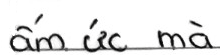

In [11]:
path = 'data/TuTao/train/img/binhan_data_0007.png'
print(tester.predict(path))
Image.open(path)


# Dự đoán nhiều ảnh

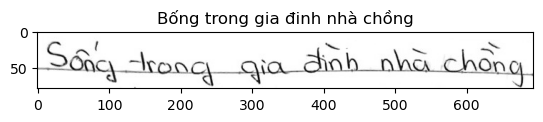

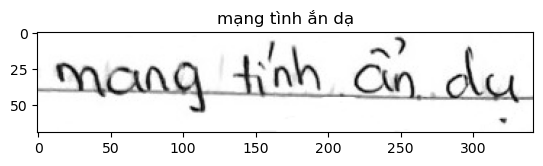

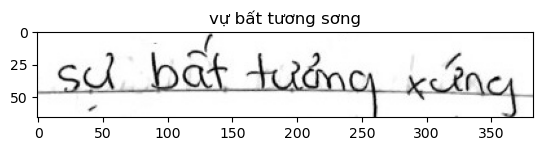

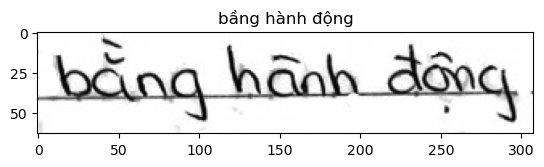

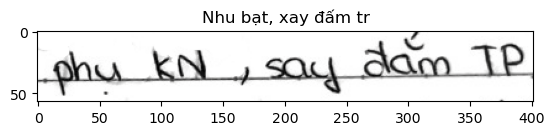

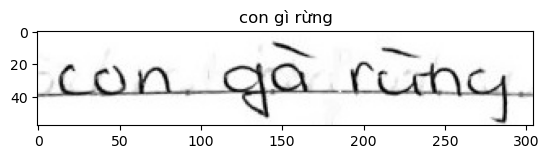

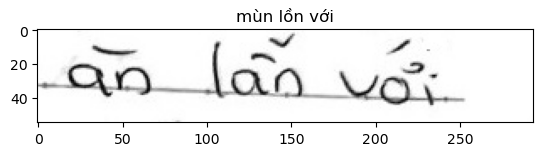

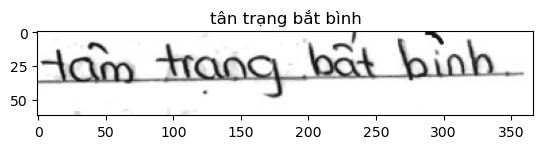

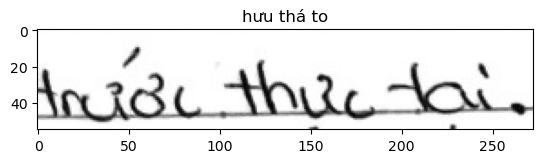

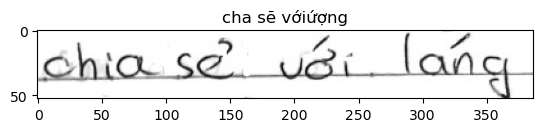

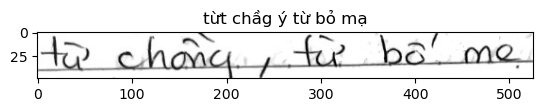

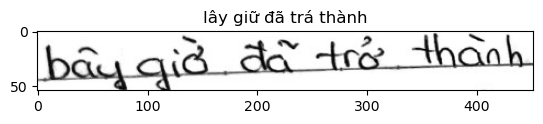

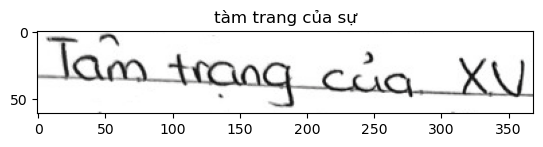

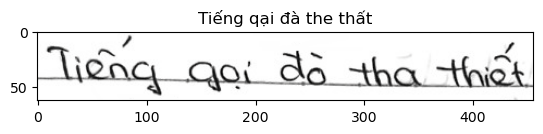

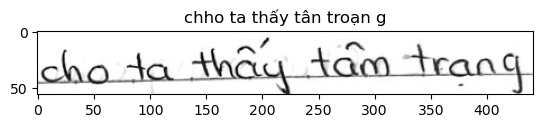

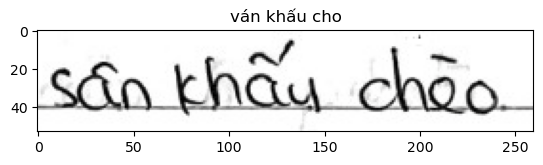

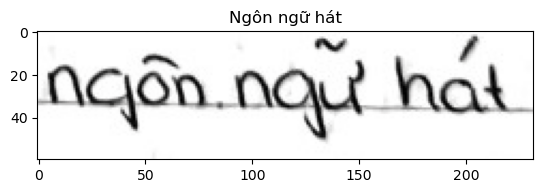

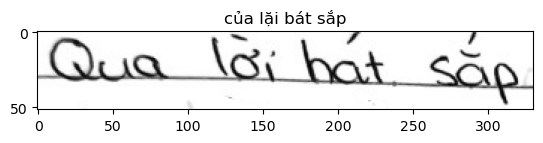

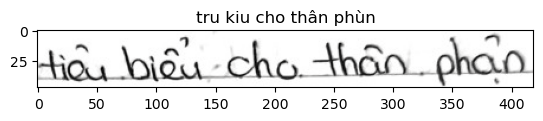

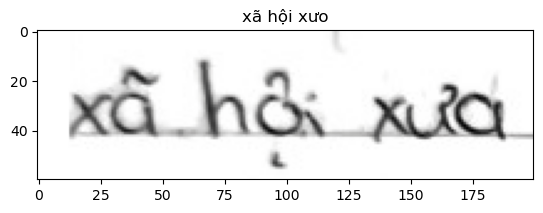

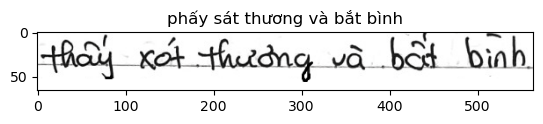

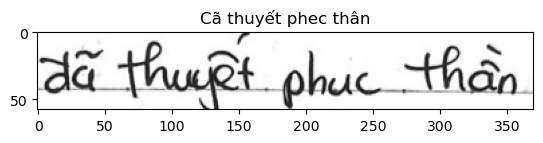

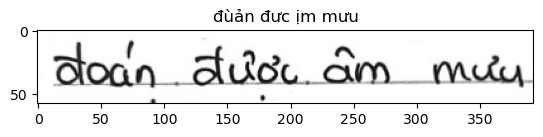

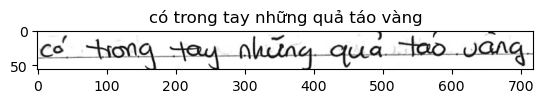

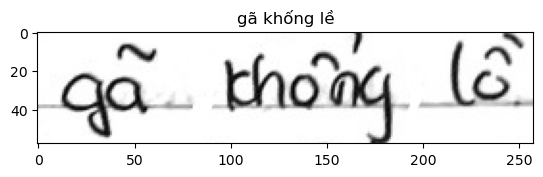

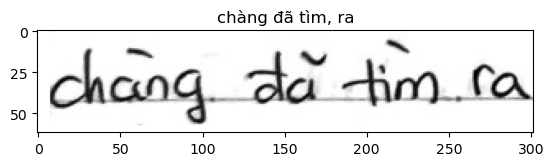

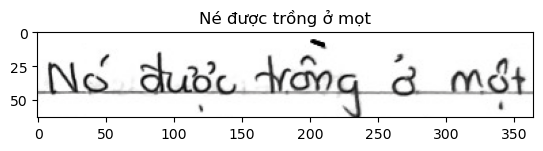

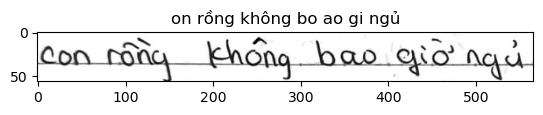

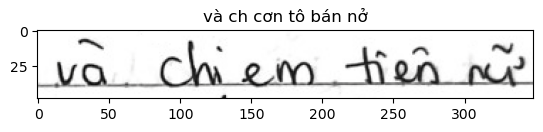

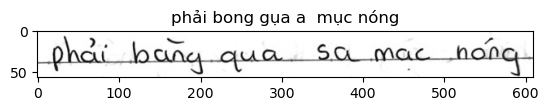

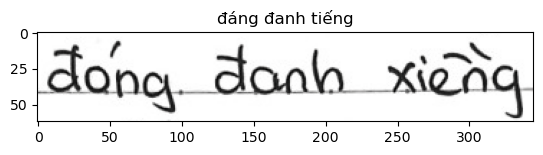

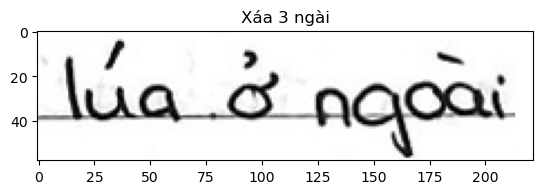

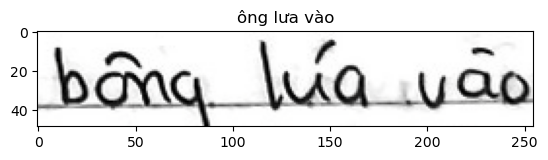

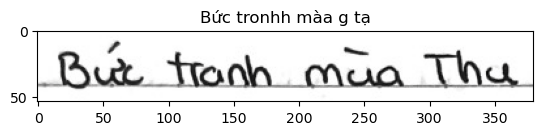

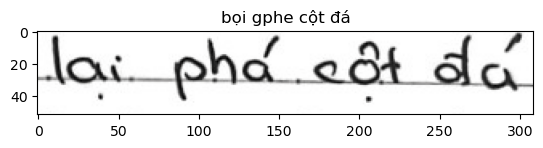

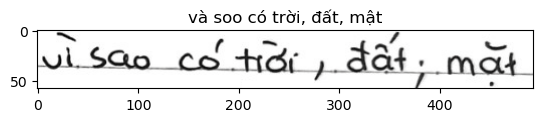

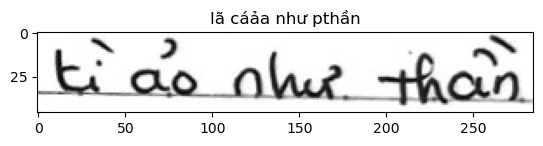

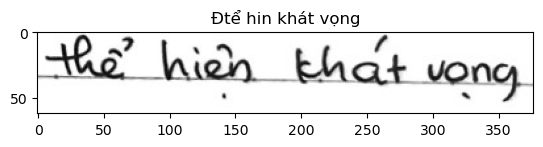

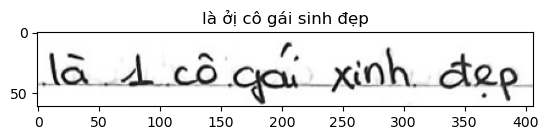

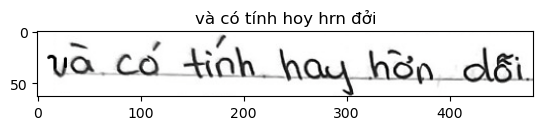

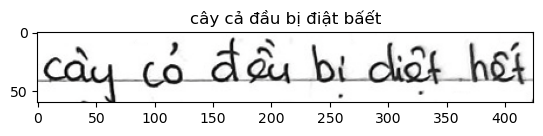

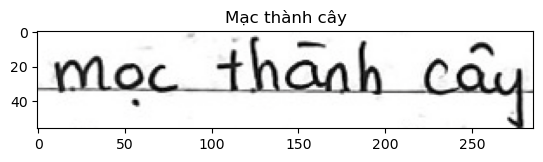

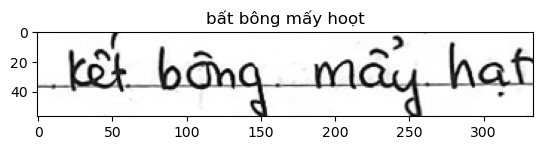

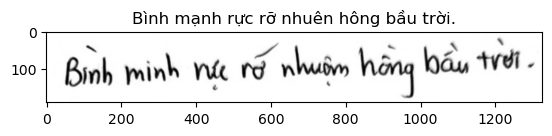

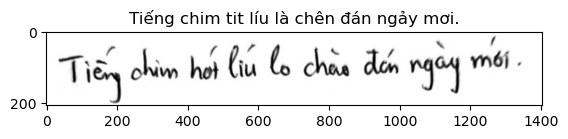

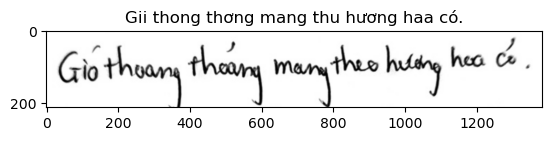

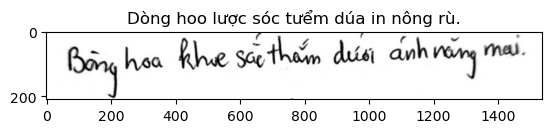

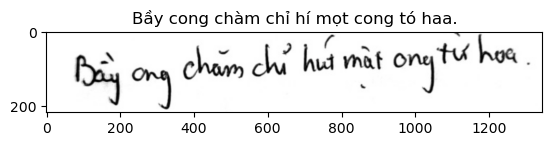

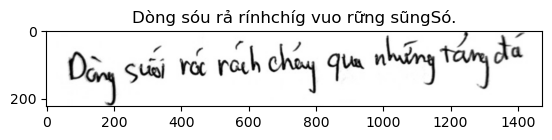

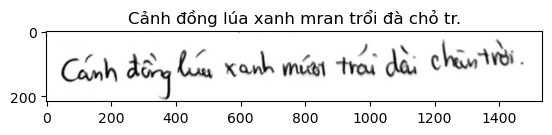

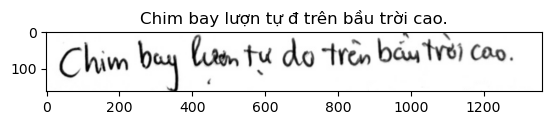

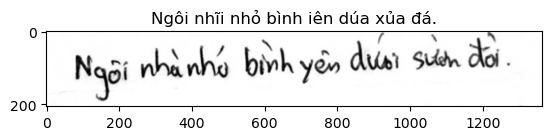

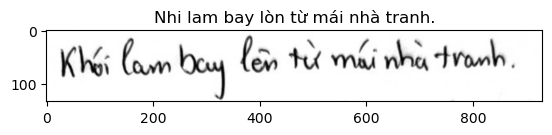

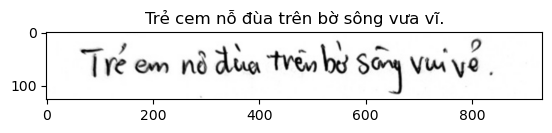

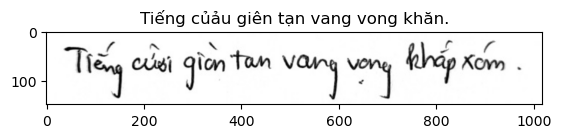

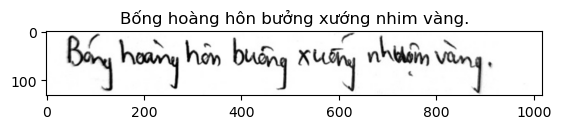

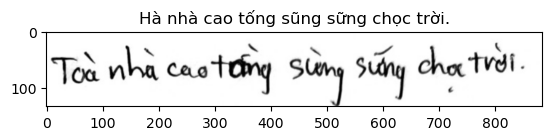

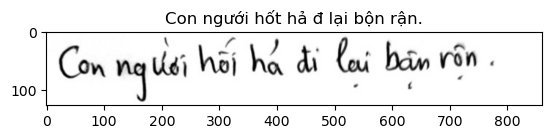

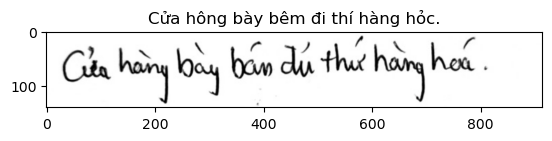

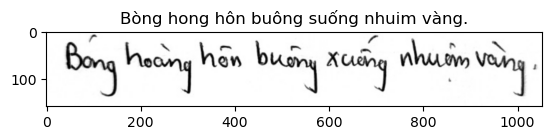

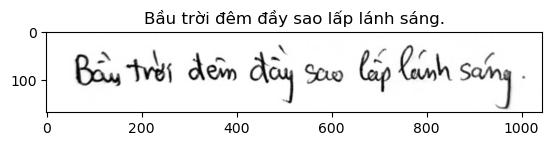

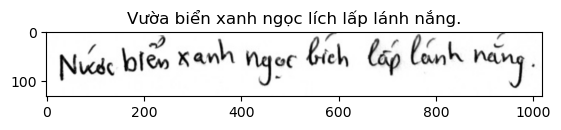

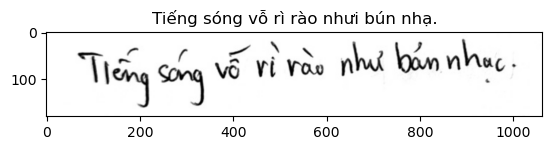

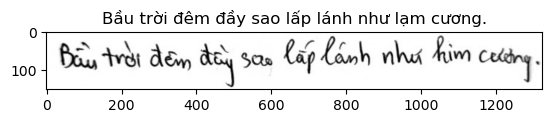

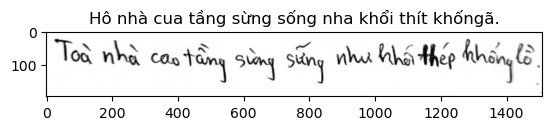

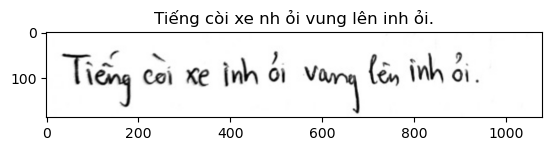

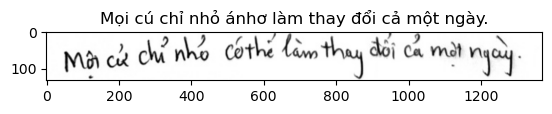

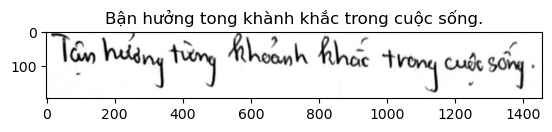

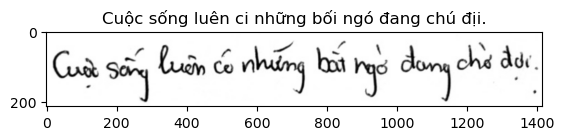

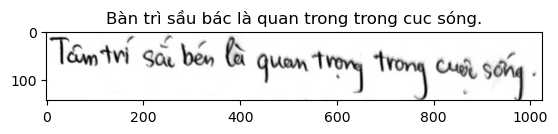

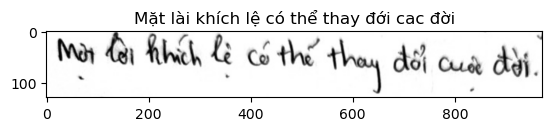

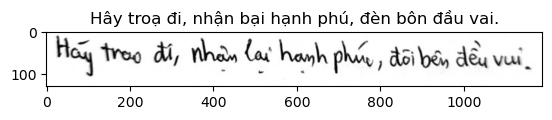

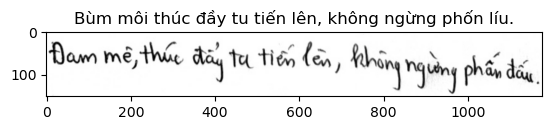

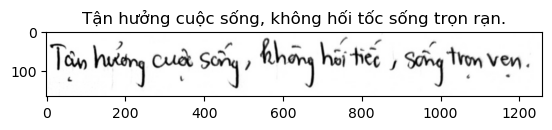

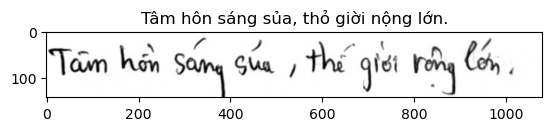

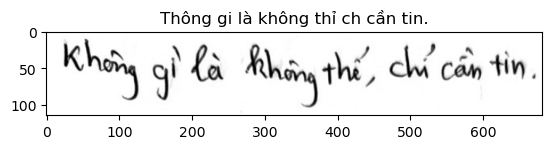

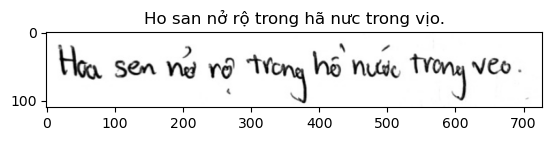

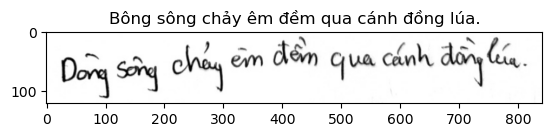

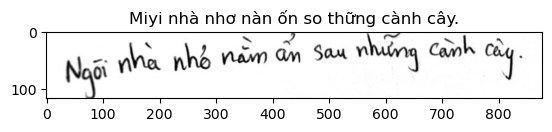

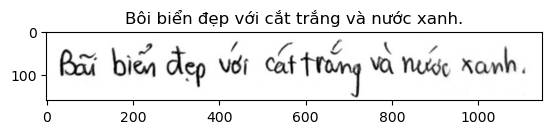

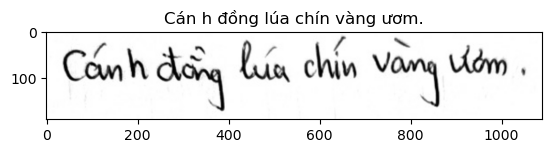

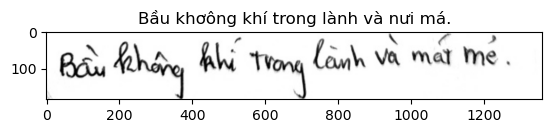

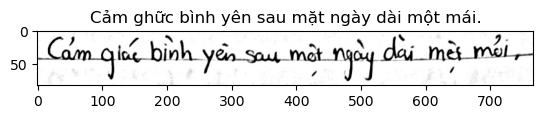

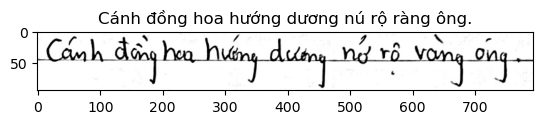

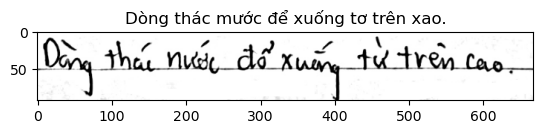

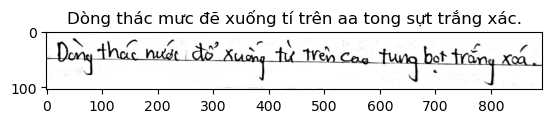

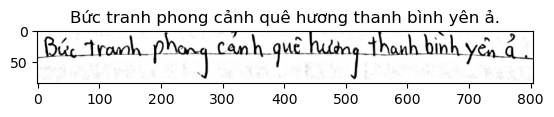

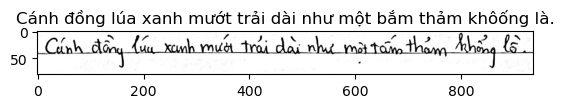

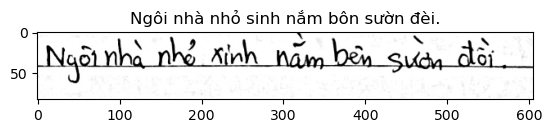

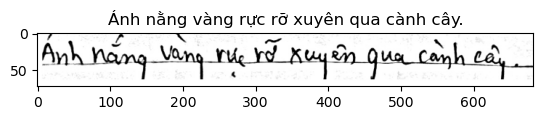

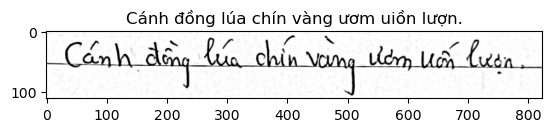

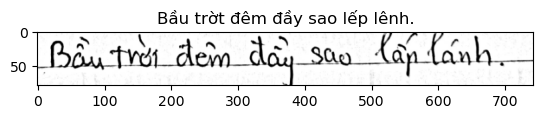

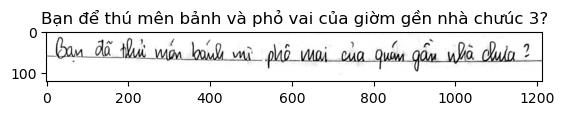

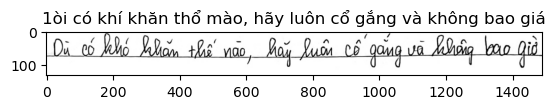

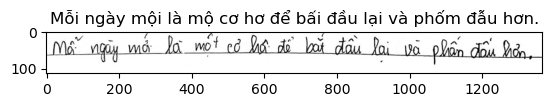

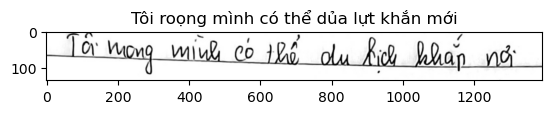

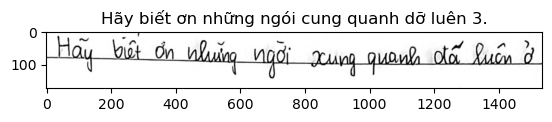

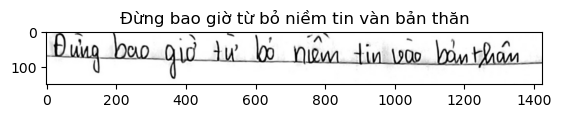

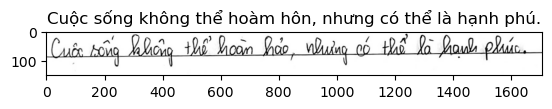

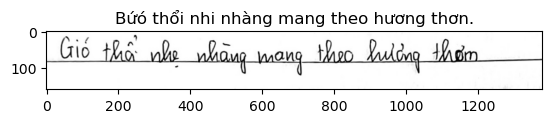

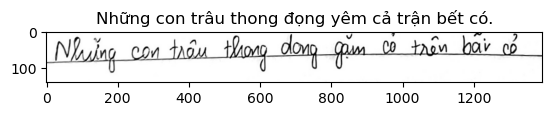

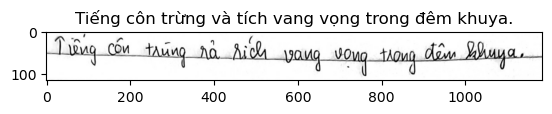

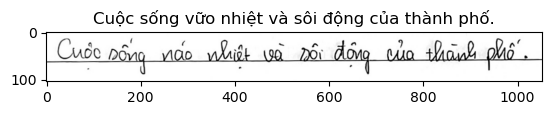

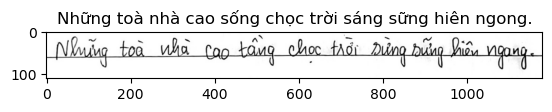

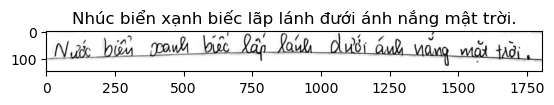

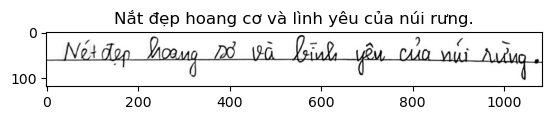

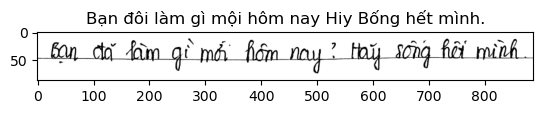

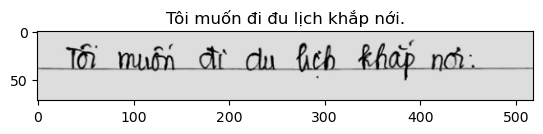

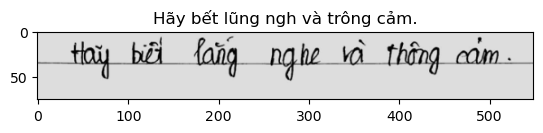

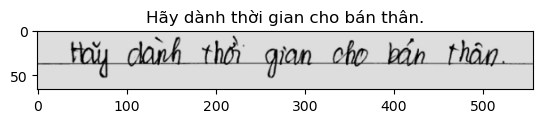

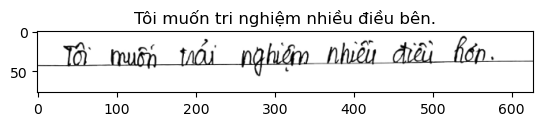

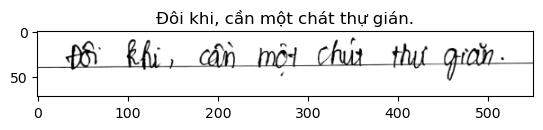

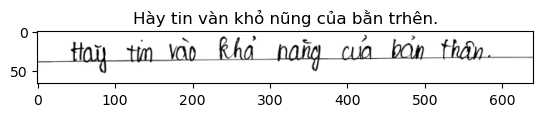

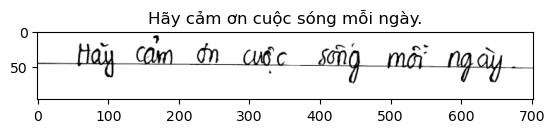

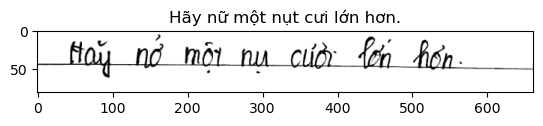

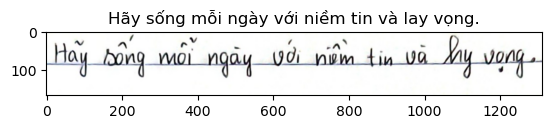

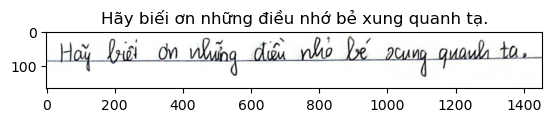

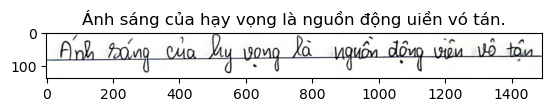

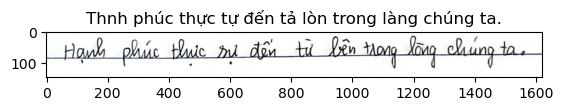

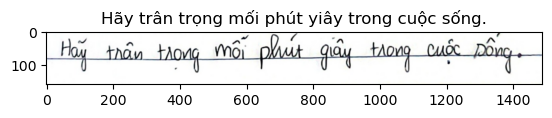

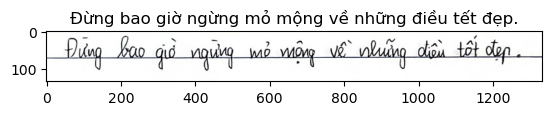

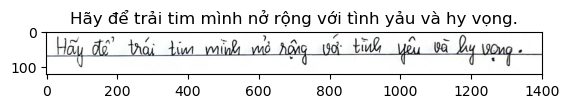

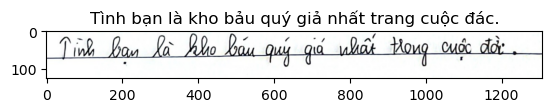

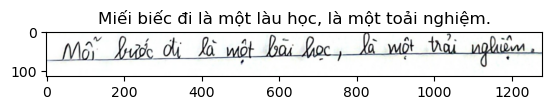

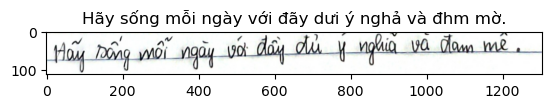

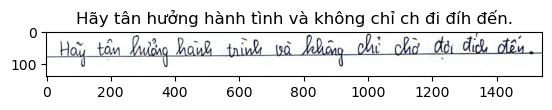

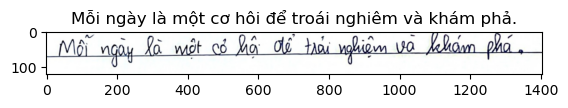

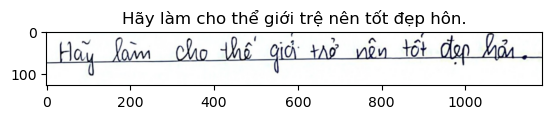

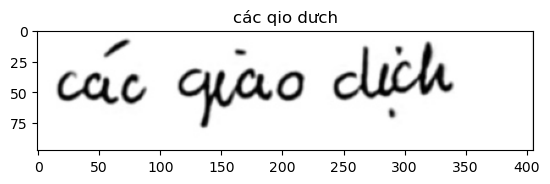

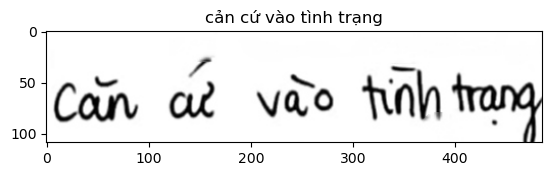

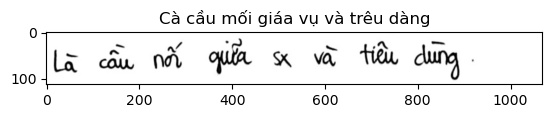

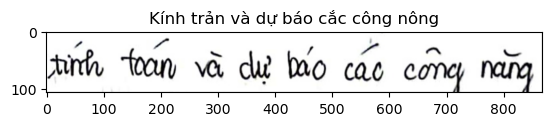

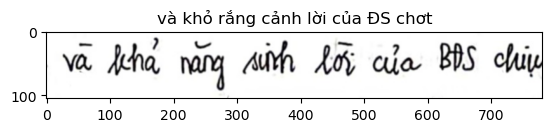

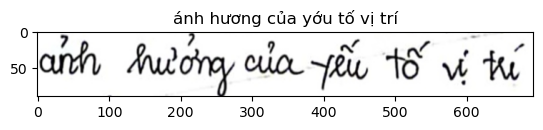

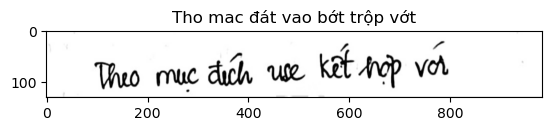

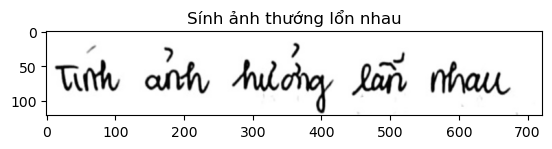

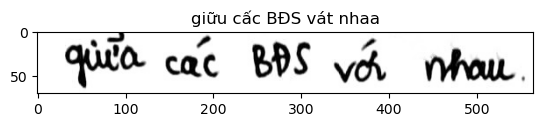

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

root = 'data/TuTao/test/img'
for i, path in enumerate(os.listdir(root)):
        imgpath = root + '/' + path
        img = Image.open(imgpath)
        plt.imshow(img)
        plt.title(tester.predict(imgpath))
        plt.show()
        